# **Early Detection of Diabetes Risk Using Supervised Learning Algorithms**

# **Project Objective**

The primary objective of this project is to develop and deploy a machine learning model for the early prediction of diabetes based on key physiological and demographic features, including pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age. By analyzing these features, the project aims to accurately identify individuals at risk of developing diabetes, enabling timely medical intervention and improved patient outcomes.

In addition to building the predictive model, the project will involve deploying the model as a user-friendly application or web service, enabling real-world usage by healthcare providers, researchers, and patients. This deployment will support the integration of data-driven decision-making into routine health assessments, contributing to more effective and accessible preventive healthcare solutions.

In [178]:
# Import neceessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# **Load Dataset**

In [179]:
data= pd.read_csv(r'c:\Users\CB\Desktop\Diabetics_Prediction\diabetes.csv') 

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
data.shape

(768, 9)

In [181]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [182]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [184]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

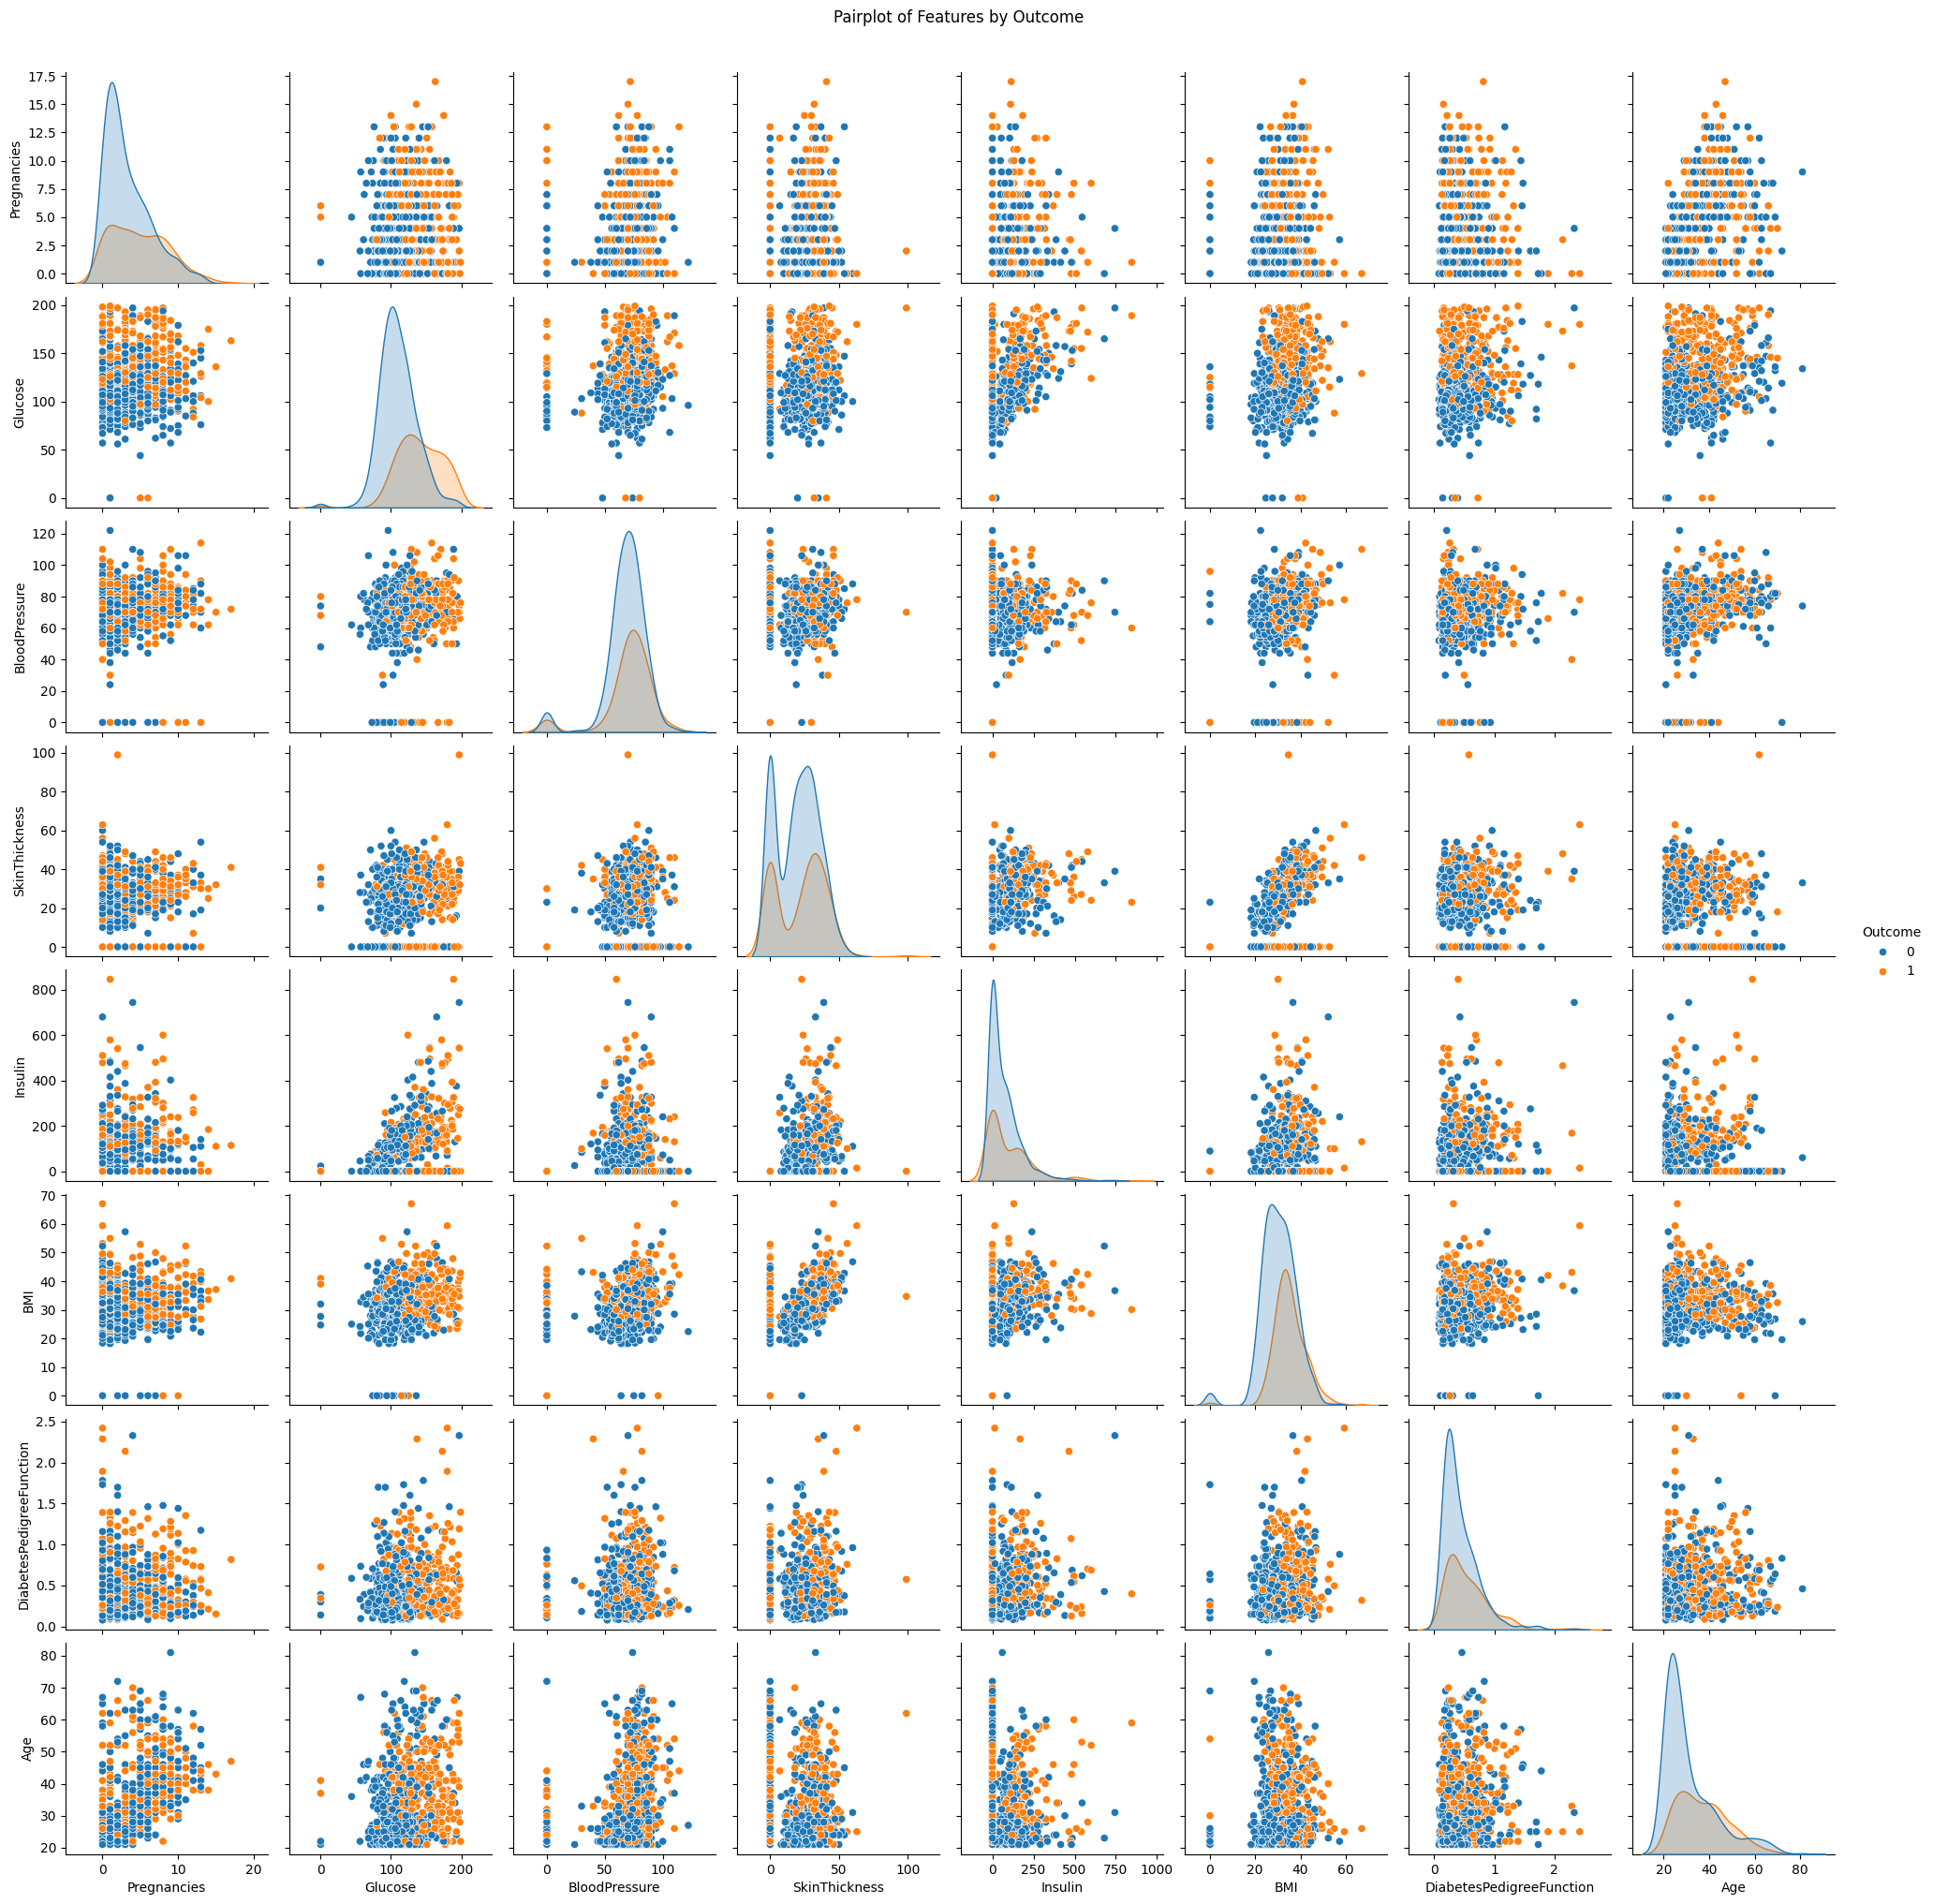

In [185]:
# Visualizations
sns.pairplot(data, hue='Outcome')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()

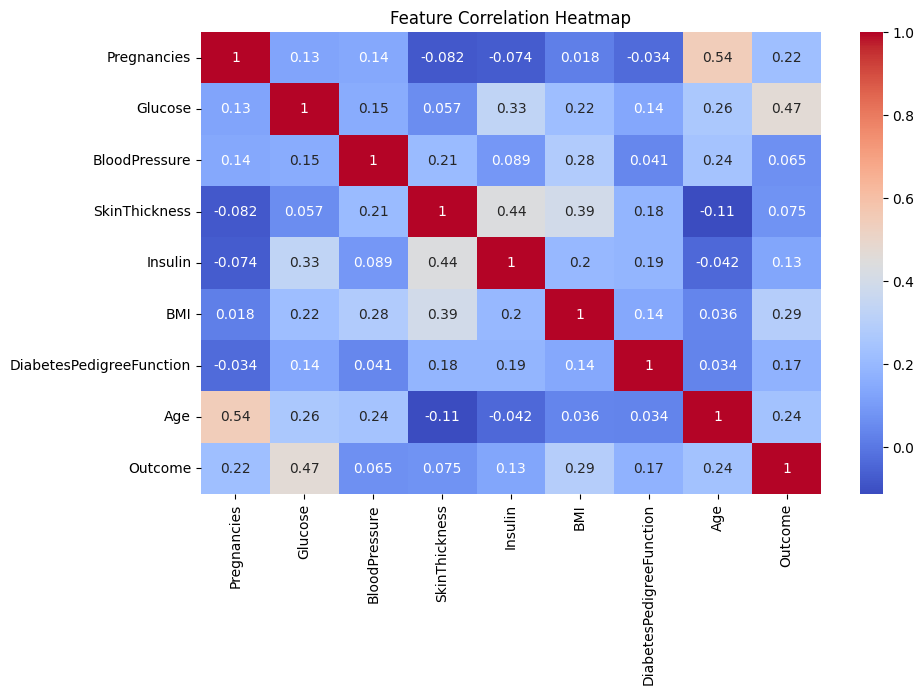

In [186]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

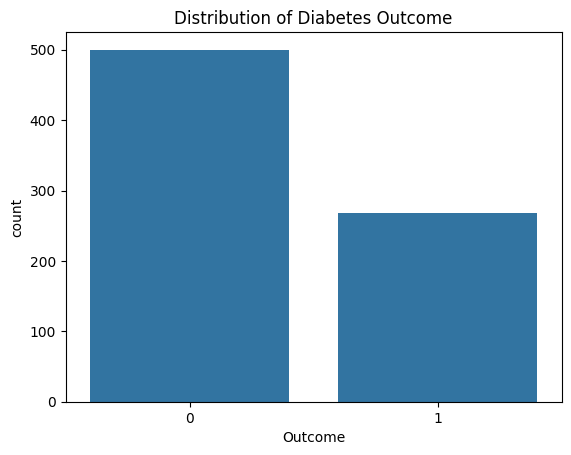

In [187]:
# Outcome distribution
sns.countplot(data=data, x='Outcome')
plt.title("Distribution of Diabetes Outcome")
plt.show()

In [188]:
# Split the data into features and target variable
X= data.drop(['Outcome'], axis=1)

y= data['Outcome']

In [189]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [190]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [191]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler= StandardScaler()

X_scaled= scaler.fit_transform(X)

In [192]:
# The data is imbalanced, so we will use SMOTE to balance it


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Check the new class distribution
from collections import Counter

# Before resampling
print("Before SMOTE:", Counter(y))

# After resampling
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 500, 1: 268})
After SMOTE: Counter({1: 500, 0: 500})


In [193]:
# Split into training and testing sets

X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state= 42)

In [194]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (800, 8) (200, 8)


# **Model training**

In [195]:
LR= LogisticRegression()

LR.fit(X_train, y_train)

LogisticRegression()

In [196]:
# Predict on the test set

y_pred= LR.predict(X_test)

In [197]:
# Evaluate the model

print("Accuracy Score is:", accuracy_score(y_test, y_pred))
print("Precision Score is:", precision_score(y_test, y_pred))
print("Recall Score is:", recall_score(y_test, y_pred))
print("ROC Score is:", roc_auc_score(y_test, y_pred))
print("Classification Report is:\n", classification_report(y_test, y_pred))
print("Confusion Matrix is:\n", confusion_matrix(y_test, y_pred))

Accuracy Score is: 0.75
Precision Score is: 0.7428571428571429
Recall Score is: 0.7722772277227723
ROC Score is: 0.7497749774977498
Classification Report is:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74        99
           1       0.74      0.77      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix is:
 [[72 27]
 [23 78]]


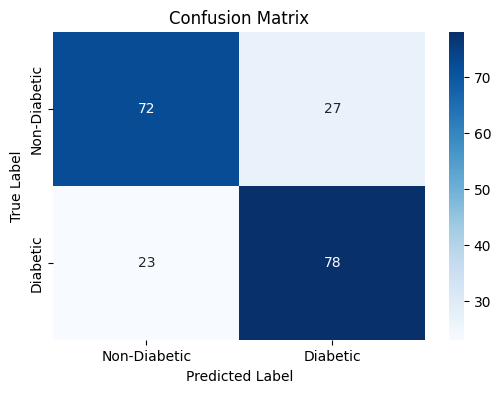

In [198]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

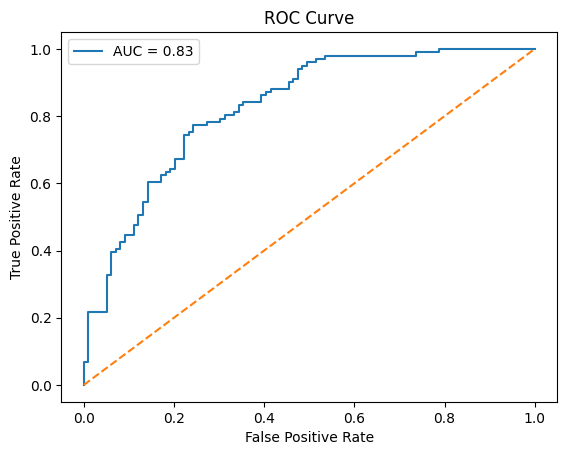

In [199]:
# ROC Curve
y_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [200]:
# Train with support vector machine

SV = svm.SVC(kernel='rbf', class_weight='balanced', random_state=42)
SV.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [201]:
y_pred2 = SV.predict(X_test)

y_pred2

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [202]:
# Evaluate the model

print(" Accuracy score is:", accuracy_score(y_test, y_pred2))
print("Precision Score is:", precision_score(y_test, y_pred2))
print("Recall Score is:", recall_score(y_test, y_pred2))
print("ROC Score is:", roc_auc_score(y_test, y_pred2))
print("Classification Report is:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix is:\n", confusion_matrix(y_test, y_pred2))

 Accuracy score is: 0.8
Precision Score is: 0.7606837606837606
Recall Score is: 0.8811881188118812
ROC Score is: 0.7991799179917991
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        99
           1       0.76      0.88      0.82       101

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Confusion Matrix is:
 [[71 28]
 [12 89]]


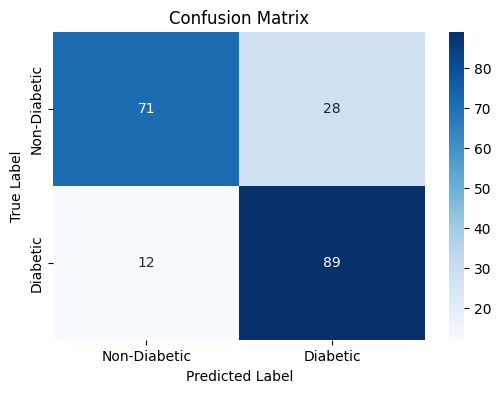

In [203]:
cm2= confusion_matrix(y_test, y_pred2)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [204]:
# Train with Decision Tree
DT= DecisionTreeClassifier()

DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [205]:
y_pred3= DT.predict(X_test)

In [206]:
# Evaluate the model

print(" Accuracy score is:", accuracy_score(y_test, y_pred3))
print("Precision Score is:", precision_score(y_test, y_pred3))
print("Recall Score is:", recall_score(y_test, y_pred3))
print("ROC Score is:", roc_auc_score(y_test, y_pred3))
print("Classification Report is:\n", classification_report(y_test, y_pred3))
print("Confusion Matrix is:\n", confusion_matrix(y_test, y_pred3))

 Accuracy score is: 0.715
Precision Score is: 0.7156862745098039
Recall Score is: 0.7227722772277227
ROC Score is: 0.7149214921492149
Classification Report is:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        99
           1       0.72      0.72      0.72       101

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

Confusion Matrix is:
 [[70 29]
 [28 73]]


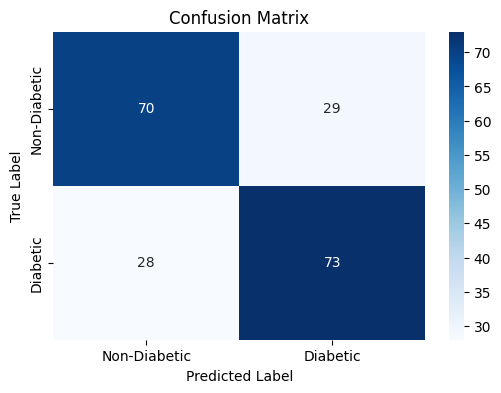

In [207]:
cm3 = confusion_matrix(y_test, y_pred3)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [208]:
# Train On RandomForest

RF= RandomForestClassifier()

RF.fit(X_train, y_train)

RandomForestClassifier()

In [209]:
y_pred4= RF.predict(X_test)

In [210]:
# Evaluate the model

print(" Accuracy score is:", accuracy_score(y_test, y_pred4))
print("Precision Score is:", precision_score(y_test, y_pred4))
print("Recall Score is:", recall_score(y_test, y_pred4))
print("ROC Score is:", roc_auc_score(y_test, y_pred4))
print("Classification Report is:\n", classification_report(y_test, y_pred4))
print("Confusion Matrix is:\n", confusion_matrix(y_test, y_pred4))

 Accuracy score is: 0.81
Precision Score is: 0.7889908256880734
Recall Score is: 0.8514851485148515
ROC Score is: 0.8095809580958095
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.79      0.85      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Confusion Matrix is:
 [[76 23]
 [15 86]]


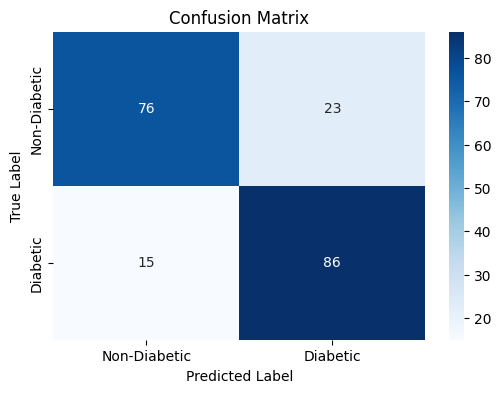

In [211]:
cm4 = confusion_matrix(y_test, y_pred4)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

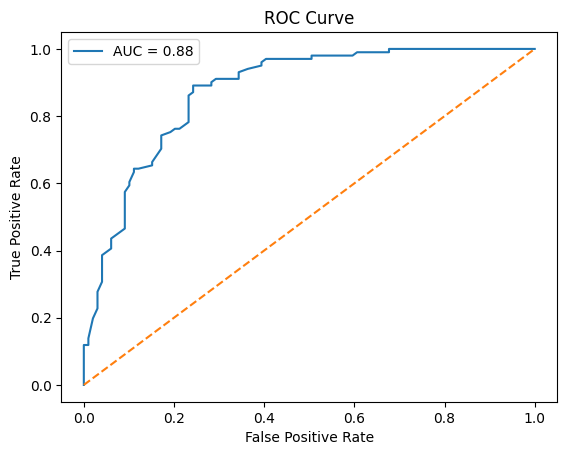

In [212]:
# ROC Curve
y_prob = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

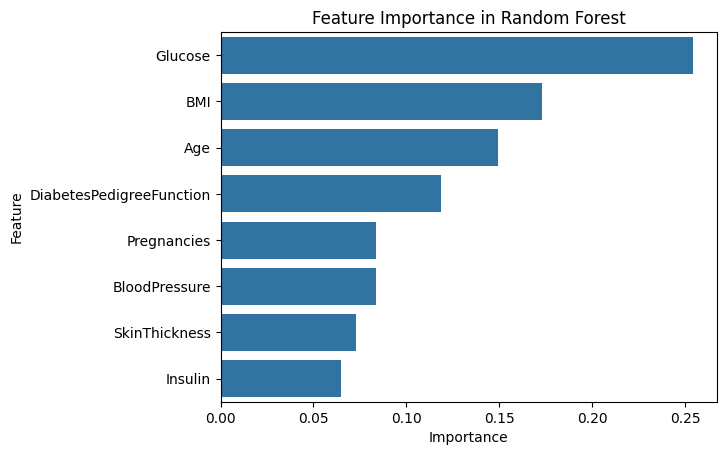

In [213]:
importances = RF.feature_importances_
feature_names = data.columns[:-1]
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance in Random Forest")
plt.show()

In [214]:
print("Conclusion:")
print("This model achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred) * 100))
print("Features like Glucose, BMI, and Age were among the most important predictors of diabetes.")


Conclusion:
This model achieved an accuracy of 75.00% on the test set.
Features like Glucose, BMI, and Age were among the most important predictors of diabetes.


# **Making a predictive system**

In [215]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = SV.predict(input_data_reshaped) # I used SVM model for prediction because it has the highest accuracy (76%)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[0]
The person is not diabetic


# **Save The Trained Model**

In [216]:
import pickle

In [217]:
with open('trained_model.sav', 'wb') as model_file:
    pickle.dump(SV, model_file)

In [218]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [219]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic
